<img src="puc.png" width="200" align="center"/>

<p style="text-align:center">&nbsp;</p>

<p style="text-align:center"><span style="font-size:20px"><strong><PUC Minas - Pontif&iacute;cia Universidade Cat&oacute;lica de Minas Gerais</strong></span></p>

<p style="text-align:center"><span style="font-size:20px"><strong>P&oacute;s-Gradua&ccedil;&atilde;o em Ci&ecirc;ncia de Dados e Big Data</strong></span></p>

<p style="text-align:center">&nbsp;</p>

<p style="text-align:center"><span style="font-size:20px"><strong>Trabalho de Conclus&atilde;o de Curso</strong></span></p>

<p style="text-align:center">&nbsp;</p>

<p style="text-align:center"><span style="font-size:16px"><strong>T&iacute;tulo</strong></span><span style="font-size:14px">: An&aacute;lise e Previs&atilde;o de&nbsp;&nbsp;Autoriza&ccedil;&atilde;o utilizando Modelos Preditivos.</span></p>

<p style="text-align:center"><span style="font-size:16px"><strong>Aluno</strong></span><span style="font-size:14px">: Fabr&iacute;cio Almeida da Silva</span></p><p>


<img src="operadora2.jpeg" width="700" align="center"/>

<h4>Este notebook é referente ao Trabalho de Conclusão de Curso em Ciência de Dados e Big Data da Pós-Graduação da PUC Minas
<br><br>Nesse trabalho serão utilizados dois datasets que foram extraídos de um data warehouse de uma empresa privada.</h4>

<strong>guias_autorizadas_01-2021_06-2021.csv --></strong> Este dataset contém as informações das guias que foram analisadas pelos médicos auditores. Foi utilizado o período de janeiro/2021 a junho/2021.

<ol>
<li>codigo_servico - Código do serviço solicitado na guia</li>
<li>situacao - Situação da autorização se está autorizada ou negada</li>
<li>tipo - Identifica se a autorização foi solicitada eletronicamente ou fisicamente na operadora</li>
<li>origem - Identifica se é local ou intercambio</li>
<li>faturado - Identifica se o serviço foi faturado para pagamento ou cobrança</li>
<li>codigo - Código da transação no sistema</li>
<li>auditoria - Identifica se houve auditoria da autorização</li>
<li>origem_beneficiario - Código da operadora do beneficiário</li>
<li>codigo_executante - Código do prestador que irá realizar o procedimento</li>
<li>codigo_requisitante - Código do prestador que requisitou o serviço</li>
<li>especialidade_executante - Código da especialidade do prestador que vai realizar o serviço</li>
<li>especialidade_requisitante - Código da especialidade do prestador que solicitou o serviço</li>
<li>plano_beneficiario - Código do plano do beneficiário</li>
<li>carater_atendimento - Identifica se é um atendimento de urgência ou eletivo</li>
<li>tipo_consulta - Identifica o tipo de serviço a ser autorizado</li>
</ol>

<strong>localizacao_operadoras.csv --></strong> Este dataset contém informações geográficas das operadoras que realizaram a solicitação.

<ol>
<li>codigo - Código do prestador que requisitou o serviço</li>
<li>municipio - Nome do município</li>
<li>estado - Nome do estado</li>
<li>pais - Pais</li>
</ol>

# Importação das Bibliotecas iniciais

In [340]:
#importando bibliotecas necessarias
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Importação dos datasets e Analise exploratoria
Nesta seção iremos importar o datasets e faremos uma breve visualização dos dados

## Trabalhando com o Dataset guias_autorizadas_01-2021_06-2021.csv

In [341]:
#importando o dataset para analise
df_guias = pd.read_csv('guias_autorizadas_01-2021_06-2021.csv', sep= ';', encoding='UTF-8')

In [342]:
#visualizando a quantidade de linhas e colunas do dataset
print("Numero de Linhas =",df_guias.shape[0])
print("Numero de Colunas =",df_guias.shape[1])


Numero de Linhas = 11951
Numero de Colunas = 15


In [343]:
#visualizando as 5 primeiras linhas do dataset
df_guias.head()

,codigo_servico,situacao,tipo,origem,faturado,codigo,auditoria,origem_beneficiario,codigo_executante,codigo_requisitante,especialidade_executante,especialidade_requisitante,plano_beneficiario,carater_atendimento,tipo_consulta
0,1244,EFETIVADA,TRANSITO INTERNACAO,TRANSACAO,SIM,5672237,SIM,LOCAL,178,178,278,278,563,ELETIVA/PRIMEIRA CONSULTA,NAO CONSULTA
1,2496,PARCIALMENTE AUTORIZADA,TRANSITO INTERNACAO,TRANSACAO,NAO,5861322,SIM,LOCAL,173,173,278,278,531,URGENCIA/EMERGENCIA,NAO CONSULTA
2,2500,EFETIVADA,TRANSITO INTERNACAO,TRANSACAO,SIM,5332998,SIM,LOCAL,202,202,278,278,538,URGENCIA/EMERGENCIA,NAO CONSULTA
3,9350,EFETIVADA,TRANSITO INTERNACAO,TRANSACAO,SIM,5332998,SIM,LOCAL,202,202,278,278,538,URGENCIA/EMERGENCIA,NAO CONSULTA
4,12076,PARCIALMENTE AUTORIZADA,TRANSITO INTERNACAO,TRANSACAO,NAO,5581250,SIM,LOCAL,179,179,278,278,622,ELETIVA/PRIMEIRA CONSULTA,NAO CONSULTA


In [344]:
#visualizando as 5 ultimas linhas do dataset
df_guias.tail()

,codigo_servico,situacao,tipo,origem,faturado,codigo,auditoria,origem_beneficiario,codigo_executante,codigo_requisitante,especialidade_executante,especialidade_requisitante,plano_beneficiario,carater_atendimento,tipo_consulta
11946,99999943,PARCIALMENTE AUTORIZADA,TRANSITO INTERNACAO,TRANSACAO,SIM,5338715,SIM,LOCAL,865,865,278,278,623,ELETIVA/PRIMEIRA CONSULTA,NAO CONSULTA
11947,99999943,PARCIALMENTE AUTORIZADA,TRANSITO INTERNACAO,TRANSACAO,SIM,5365321,SIM,LOCAL,865,865,278,278,563,ELETIVA/PRIMEIRA CONSULTA,NAO CONSULTA
11948,99999943,PARCIALMENTE AUTORIZADA,TRANSITO INTERNACAO,TRANSACAO,SIM,5792510,SIM,LOCAL,233,233,278,278,622,ELETIVA/PRIMEIRA CONSULTA,NAO CONSULTA
11949,99999943,PARCIALMENTE AUTORIZADA,TRANSITO SERVICO,TRANSACAO,NAO,5435478,SIM,LOCAL,166,166,278,278,529,ELETIVA/PRIMEIRA CONSULTA,NAO CONSULTA
11950,99999943,AUTORIZADA,SERVIÇO,AUTORIZACAO,NAO,77419622,SIM,LOCAL,6,6,466,466,322,ELETIVA/PRIMEIRA CONSULTA,NAO CONSULTA


In [345]:
#visualizando os tipos dos dados
df_guias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11951 entries, 0 to 11950
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   codigo_servico              11951 non-null  object
 1   situacao                    11951 non-null  object
 2   tipo                        11951 non-null  object
 3   origem                      11951 non-null  object
 4   faturado                    11951 non-null  object
 5   codigo                      11951 non-null  int64 
 6   auditoria                   11951 non-null  object
 7   origem_beneficiario         11951 non-null  object
 8   codigo_executante           11951 non-null  int64 
 9   codigo_requisitante         11951 non-null  int64 
 10  especialidade_executante    11951 non-null  int64 
 11  especialidade_requisitante  11951 non-null  int64 
 12  plano_beneficiario          11951 non-null  int64 
 13  carater_atendimento         11951 non-null  ob

In [346]:
#verificando se existem campos nulos
df_guias.isnull().sum()

codigo_servico                0
situacao                      0
tipo                          0
origem                        0
faturado                      0
codigo                        0
auditoria                     0
origem_beneficiario           0
codigo_executante             0
codigo_requisitante           0
especialidade_executante      0
especialidade_requisitante    0
plano_beneficiario            0
carater_atendimento           0
tipo_consulta                 0
dtype: int64

In [347]:
#visualizando as medidas estatísticas dos atributos numéricas
df_guias.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
codigo,11951.0,6.290138e+06,7.107624e+06,5313592.0,5429088.0,5573307.0,5737831.0,77473972.0
codigo_executante,11951.0,3.352212e+02,2.562648e+02,6.0,200.0,229.0,286.0,988.0
codigo_requisitante,11951.0,3.357603e+02,2.566209e+02,6.0,200.0,231.0,286.0,988.0
especialidade_executante,11951.0,2.780315e+02,2.431938e+00,278.0,278.0,278.0,278.0,466.0
especialidade_requisitante,11951.0,2.780315e+02,2.431938e+00,278.0,278.0,278.0,278.0,466.0
plano_beneficiario,11951.0,5.738592e+02,6.832121e+01,2.0,542.0,572.0,622.0,627.0


In [348]:
#verificando os atributos com valores únicos no dataset
df_guias.nunique()

codigo_servico                1824
situacao                         6
tipo                             6
origem                           2
faturado                         2
codigo                        6116
auditoria                        1
origem_beneficiario              1
codigo_executante              138
codigo_requisitante            141
especialidade_executante         2
especialidade_requisitante       2
plano_beneficiario              82
carater_atendimento              2
tipo_consulta                    4
dtype: int64

## Trabalhando com o Dataset localizacao_operadoras.csv

In [349]:
#importando o dataset para analise
df_local = pd.read_csv('localizacao_operadoras.csv', sep= ';', encoding='UTF-8')

In [350]:
#visualizando a quantidade de linhas e colunas do dataset
print("Numero de Linhas =",df_local.shape[0])
print("Numero de Colunas =",df_local.shape[1])


Numero de Linhas = 11951
Numero de Colunas = 4


In [351]:
#visualizando as 5 primeiras linhas do dataset
df_local.head()

,codigo,municipio,estado,pais
0,178,NOVA OLINDA DO NORTE,AMAZONAS,BRASIL
1,173,MANAUS,AMAZONAS,BRASIL
2,202,FERREIRA GOMES,AMAPA,BRASIL
3,202,FERREIRA GOMES,AMAPA,BRASIL
4,179,NOVO AIRAO,AMAZONAS,BRASIL


In [352]:
#visualizando as 5 ultimas linhas do dataset
df_local.tail()

,codigo,municipio,estado,pais
11946,865,IPIAU,BAHIA,BRASIL
11947,865,IPIAU,BAHIA,BRASIL
11948,233,ANTAS,BAHIA,BRASIL
11949,166,ITAPIRANGA,AMAZONAS,BRASIL
11950,6,CRUZEIRO DO SUL,ACRE,BRASIL


In [353]:
#visualizando os tipos dos dados
df_local.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11951 entries, 0 to 11950
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   codigo     11951 non-null  int64 
 1   municipio  11951 non-null  object
 2   estado     11951 non-null  object
 3   pais       11951 non-null  object
dtypes: int64(1), object(3)
memory usage: 373.6+ KB


In [354]:
#verificando se existem campos nulos
df_local.isnull().sum()

codigo       0
municipio    0
estado       0
pais         0
dtype: int64

In [355]:
#verificando os atributos com valores únicos no dataset
df_local.nunique()

codigo       141
municipio    141
estado         5
pais           1
dtype: int64

# Tratamento dos datasets

### Dataframe df_guias

In [356]:
#visualizando as 5 primeiras linhas do dataframe
df_guias.head()

,codigo_servico,situacao,tipo,origem,faturado,codigo,auditoria,origem_beneficiario,codigo_executante,codigo_requisitante,especialidade_executante,especialidade_requisitante,plano_beneficiario,carater_atendimento,tipo_consulta
0,1244,EFETIVADA,TRANSITO INTERNACAO,TRANSACAO,SIM,5672237,SIM,LOCAL,178,178,278,278,563,ELETIVA/PRIMEIRA CONSULTA,NAO CONSULTA
1,2496,PARCIALMENTE AUTORIZADA,TRANSITO INTERNACAO,TRANSACAO,NAO,5861322,SIM,LOCAL,173,173,278,278,531,URGENCIA/EMERGENCIA,NAO CONSULTA
2,2500,EFETIVADA,TRANSITO INTERNACAO,TRANSACAO,SIM,5332998,SIM,LOCAL,202,202,278,278,538,URGENCIA/EMERGENCIA,NAO CONSULTA
3,9350,EFETIVADA,TRANSITO INTERNACAO,TRANSACAO,SIM,5332998,SIM,LOCAL,202,202,278,278,538,URGENCIA/EMERGENCIA,NAO CONSULTA
4,12076,PARCIALMENTE AUTORIZADA,TRANSITO INTERNACAO,TRANSACAO,NAO,5581250,SIM,LOCAL,179,179,278,278,622,ELETIVA/PRIMEIRA CONSULTA,NAO CONSULTA


In [357]:
#remoção de algumas colunas
df_guias = df_guias.drop(columns=['faturado','auditoria'])

In [358]:
#visualizando a quantidade de linhas e colunas do dataset apos a exclusão das colunas
print("Numero de Linhas =",df_guias.shape[0])
print("Numero de Colunas =",df_guias.shape[1])


Numero de Linhas = 11951
Numero de Colunas = 13


In [359]:
#renomeando algumas colunas
df_guias = df_guias.rename(columns={'codigo_servico': 'cd_servico','codigo':'cd_guia','codigo_executante': 'cd_executante','codigo_requisitante': 'cd_requisitante','especialidade_executante':'esp_executante','especialidade_requisitante':'esp_requisitante','carater_atendimento': 'tipo_atendimento'})

In [360]:
#visualizando as 5 primeiras linhas do dataframe apos renomear as algumas colunas
df_guias.head()

,cd_servico,situacao,tipo,origem,cd_guia,origem_beneficiario,cd_executante,cd_requisitante,esp_executante,esp_requisitante,plano_beneficiario,tipo_atendimento,tipo_consulta
0,1244,EFETIVADA,TRANSITO INTERNACAO,TRANSACAO,5672237,LOCAL,178,178,278,278,563,ELETIVA/PRIMEIRA CONSULTA,NAO CONSULTA
1,2496,PARCIALMENTE AUTORIZADA,TRANSITO INTERNACAO,TRANSACAO,5861322,LOCAL,173,173,278,278,531,URGENCIA/EMERGENCIA,NAO CONSULTA
2,2500,EFETIVADA,TRANSITO INTERNACAO,TRANSACAO,5332998,LOCAL,202,202,278,278,538,URGENCIA/EMERGENCIA,NAO CONSULTA
3,9350,EFETIVADA,TRANSITO INTERNACAO,TRANSACAO,5332998,LOCAL,202,202,278,278,538,URGENCIA/EMERGENCIA,NAO CONSULTA
4,12076,PARCIALMENTE AUTORIZADA,TRANSITO INTERNACAO,TRANSACAO,5581250,LOCAL,179,179,278,278,622,ELETIVA/PRIMEIRA CONSULTA,NAO CONSULTA


In [361]:
#verificando os tipos de dados das colunas
df_guias.dtypes

cd_servico             object
situacao               object
tipo                   object
origem                 object
cd_guia                 int64
origem_beneficiario    object
cd_executante           int64
cd_requisitante         int64
esp_executante          int64
esp_requisitante        int64
plano_beneficiario      int64
tipo_atendimento       object
tipo_consulta          object
dtype: object

In [362]:
#removendo pontos e traços da coluna
df_guias['cd_servico'] = df_guias['cd_servico'].apply(lambda caracter: caracter.replace('.','').replace('-',''))

In [363]:
#convertendo a coluna para o tipo inteiro
df_guias['cd_servico'] = df_guias['cd_servico'].astype(int)

In [364]:
#verificando os tipos de dados das colunas apos a conversão
df_guias.dtypes

cd_servico              int32
situacao               object
tipo                   object
origem                 object
cd_guia                 int64
origem_beneficiario    object
cd_executante           int64
cd_requisitante         int64
esp_executante          int64
esp_requisitante        int64
plano_beneficiario      int64
tipo_atendimento       object
tipo_consulta          object
dtype: object

In [365]:
#visualizando informações
df_guias['tipo_atendimento'].value_counts()

ELETIVA/PRIMEIRA CONSULTA    10317
URGENCIA/EMERGENCIA           1634
Name: tipo_atendimento, dtype: int64

In [366]:
#alterando os conteudos da coluna
df_guias['tipo_atendimento'] = df_guias['tipo_atendimento'].apply(lambda caracter: caracter.replace('ELETIVA/PRIMEIRA CONSULTA','ELETIVA').replace('URGENCIA/EMERGENCIA','URGENCIA'))

In [367]:
#conteudo apos a alteração
df_guias['tipo_atendimento'].value_counts()

ELETIVA     10317
URGENCIA     1634
Name: tipo_atendimento, dtype: int64

In [368]:
#visualizando informações
df_guias['situacao'].value_counts()

EFETIVADA                  8034
CANCELADA                  1782
NEGADA                     1361
PARCIALMENTE AUTORIZADA     690
AUTORIZADA                   67
EM AUDITORIA                 17
Name: situacao, dtype: int64

In [369]:
#nessa coluna temos 6 tipos de situacao, precisamos das linhas que tenham apenas as situações AUTORIZADA E NEGADA.
#iremos manter a situacao EFETIVADA pois a mesma equivale a AUTORIZADA no dataset original

#removendo as linhas com as situações: CANCELADA,PARCIALMENTE AUTORIZADA e EM AUDITORIA
df_guias = df_guias.drop(df_guias.loc[df_guias['situacao'] == 'CANCELADA'].index)
df_guias = df_guias.drop(df_guias.loc[df_guias['situacao'] == 'PARCIALMENTE AUTORIZADA'].index)
df_guias = df_guias.drop(df_guias.loc[df_guias['situacao'] == 'EM AUDITORIA'].index)

In [370]:
#visualizando informações
df_guias['situacao'].value_counts()

EFETIVADA     8034
NEGADA        1361
AUTORIZADA      67
Name: situacao, dtype: int64

In [371]:
#renomeando a situacao EFETIVADA para AUTORIZADA
df_guias['situacao'] = df_guias['situacao'].apply(lambda x: x.replace('EFETIVADA','AUTORIZADA'))

In [372]:
#visualizando informações
df_guias['situacao'].value_counts()

AUTORIZADA    8101
NEGADA        1361
Name: situacao, dtype: int64

In [373]:
#vendo o shape do dataframe apos as alterações
df_guias.shape

(9462, 13)

### Dataframe localizacao_operadoras.csv

In [374]:
df_local.head()

,codigo,municipio,estado,pais
0,178,NOVA OLINDA DO NORTE,AMAZONAS,BRASIL
1,173,MANAUS,AMAZONAS,BRASIL
2,202,FERREIRA GOMES,AMAPA,BRASIL
3,202,FERREIRA GOMES,AMAPA,BRASIL
4,179,NOVO AIRAO,AMAZONAS,BRASIL


In [375]:
#renomeando coluna
df_local = df_local.rename(columns={'codigo': 'cd_operadora'})

In [376]:
#visualizando a quantidade de linhas e colunas do dataset apos a exclusão das colunas
print("Numero de Linhas =",df_local.shape[0])
print("Numero de Colunas =",df_local.shape[1])

Numero de Linhas = 11951
Numero de Colunas = 4


In [377]:
#visualizando as 5 primeiras linhas do dataframe apos alterações
df_local.head()

,cd_operadora,municipio,estado,pais
0,178,NOVA OLINDA DO NORTE,AMAZONAS,BRASIL
1,173,MANAUS,AMAZONAS,BRASIL
2,202,FERREIRA GOMES,AMAPA,BRASIL
3,202,FERREIRA GOMES,AMAPA,BRASIL
4,179,NOVO AIRAO,AMAZONAS,BRASIL


In [378]:
#verificando os tipos de dados das colunas
df_local.dtypes

cd_operadora     int64
municipio       object
estado          object
pais            object
dtype: object

# Unindo os dois datasets e realizando algumas analises
- Nessa etapa vamos unir o dataset  df_guias e df_local e transforma-los em um dataset chamado df_autorizacao.
- Vamos realizar algumas analises

### Unindo os dois datasets

In [379]:
#visualizando a quantidade de linhas e colunas do dataset antes da junção
print("Numero de Linhas =",df_guias.shape[0])
print("Numero de Colunas =",df_guias.shape[1])


Numero de Linhas = 9462
Numero de Colunas = 13


In [380]:
#visualizando a quantidade de linhas e colunas do dataset antes da junção
print("Numero de Linhas =",df_local.shape[0])
print("Numero de Colunas =",df_local.shape[1])


Numero de Linhas = 11951
Numero de Colunas = 4


In [381]:
#unindo os dois datasets usando join 
df_autorizacao = df_guias.join(df_local,lsuffix='cd_requisitante',rsuffix='cd_operadora',how='left')
df_autorizacao.shape

(9462, 17)

In [382]:
#visualizando a quantidade de linhas e colunas do dataset apos a junção
print("Numero de Linhas =",df_autorizacao.shape[0])
print("Numero de Colunas =",df_autorizacao.shape[1])


Numero de Linhas = 9462
Numero de Colunas = 17


In [383]:
#visualizando as 5 primeiras linhas do dataset apos a junção
df_autorizacao.head()

,cd_servico,situacao,tipo,origem,cd_guia,origem_beneficiario,cd_executante,cd_requisitante,esp_executante,esp_requisitante,plano_beneficiario,tipo_atendimento,tipo_consulta,cd_operadora,municipio,estado,pais
0,1244,AUTORIZADA,TRANSITO INTERNACAO,TRANSACAO,5672237,LOCAL,178,178,278,278,563,ELETIVA,NAO CONSULTA,178,NOVA OLINDA DO NORTE,AMAZONAS,BRASIL
2,2500,AUTORIZADA,TRANSITO INTERNACAO,TRANSACAO,5332998,LOCAL,202,202,278,278,538,URGENCIA,NAO CONSULTA,202,FERREIRA GOMES,AMAPA,BRASIL
3,9350,AUTORIZADA,TRANSITO INTERNACAO,TRANSACAO,5332998,LOCAL,202,202,278,278,538,URGENCIA,NAO CONSULTA,202,FERREIRA GOMES,AMAPA,BRASIL
7,22403,AUTORIZADA,TRANSITO INTERNACAO,TRANSACAO,5404770,LOCAL,282,282,278,278,583,URGENCIA,NAO CONSULTA,282,CAIRU,BAHIA,BRASIL
8,24554,AUTORIZADA,TRANSITO SERVICO,TRANSACAO,5654489,LOCAL,236,236,278,278,537,ELETIVA,NAO CONSULTA,236,APORA,BAHIA,BRASIL


In [384]:
#visualizando os tipos dos dados
df_autorizacao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9462 entries, 0 to 11950
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cd_servico           9462 non-null   int32 
 1   situacao             9462 non-null   object
 2   tipo                 9462 non-null   object
 3   origem               9462 non-null   object
 4   cd_guia              9462 non-null   int64 
 5   origem_beneficiario  9462 non-null   object
 6   cd_executante        9462 non-null   int64 
 7   cd_requisitante      9462 non-null   int64 
 8   esp_executante       9462 non-null   int64 
 9   esp_requisitante     9462 non-null   int64 
 10  plano_beneficiario   9462 non-null   int64 
 11  tipo_atendimento     9462 non-null   object
 12  tipo_consulta        9462 non-null   object
 13  cd_operadora         9462 non-null   int64 
 14  municipio            9462 non-null   object
 15  estado               9462 non-null   object
 16  pais 

In [385]:
#verificando se existe algum valor nulo
df_autorizacao.isnull().sum()

cd_servico             0
situacao               0
tipo                   0
origem                 0
cd_guia                0
origem_beneficiario    0
cd_executante          0
cd_requisitante        0
esp_executante         0
esp_requisitante       0
plano_beneficiario     0
tipo_atendimento       0
tipo_consulta          0
cd_operadora           0
municipio              0
estado                 0
pais                   0
dtype: int64

In [386]:
#verificando algumas estatisticas dos atributos numericos
df_autorizacao.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cd_servico,9462.0,4.284577e+07,1.988035e+07,1244.0,40101010.00,40316548.0,50000470.0,99999943.0
cd_guia,9462.0,6.211932e+06,6.703088e+06,5313592.0,5429088.00,5573452.0,5740870.0,77473972.0
cd_executante,9462.0,3.375014e+02,2.579790e+02,6.0,198.00,229.0,286.0,988.0
cd_requisitante,9462.0,3.381822e+02,2.584196e+02,6.0,199.25,229.0,286.0,988.0
esp_executante,9462.0,2.780397e+02,2.733118e+00,278.0,278.00,278.0,278.0,466.0
esp_requisitante,9462.0,2.780397e+02,2.733118e+00,278.0,278.00,278.0,278.0,466.0
plano_beneficiario,9462.0,5.725736e+02,6.983521e+01,2.0,538.00,569.0,622.0,627.0
cd_operadora,9462.0,3.381822e+02,2.584196e+02,6.0,199.25,229.0,286.0,988.0


### Qual a quantidade de autorizações solicitadas por estado?

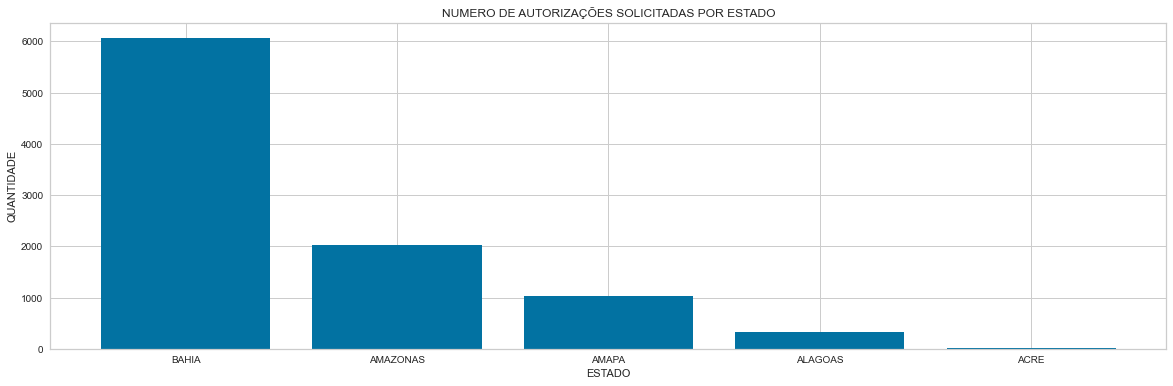

In [387]:
plt.rcParams['figure.figsize'] = [20, 6]

x = df_autorizacao['estado'].value_counts().head(10).index

y = df_autorizacao['estado'].value_counts().head(10).values

plt.bar(x,y)

plt.ylabel("QUANTIDADE")

plt.xlabel("ESTADO")

plt.title("NUMERO DE AUTORIZAÇÕES SOLICITADAS POR ESTADO")

plt.show();



### Quais os 10 municipios que mais tiveram solicitações de autorização?

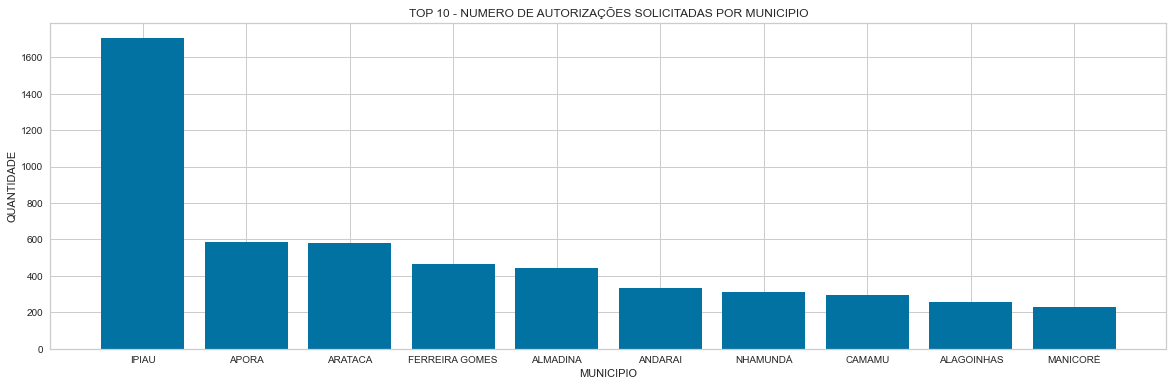

In [388]:
plt.rcParams['figure.figsize'] = [20, 6]

x = df_autorizacao['municipio'].value_counts().head(10).index

y = df_autorizacao['municipio'].value_counts().head(10).values

plt.bar(x,y)

plt.ylabel("QUANTIDADE")

plt.xlabel("MUNICIPIO")

plt.title("TOP 10 - NUMERO DE AUTORIZAÇÕES SOLICITADAS POR MUNICIPIO")

plt.show();

### Quais as 10 operadoras de plano de saúde que mais tiveram solicitações de autorização?

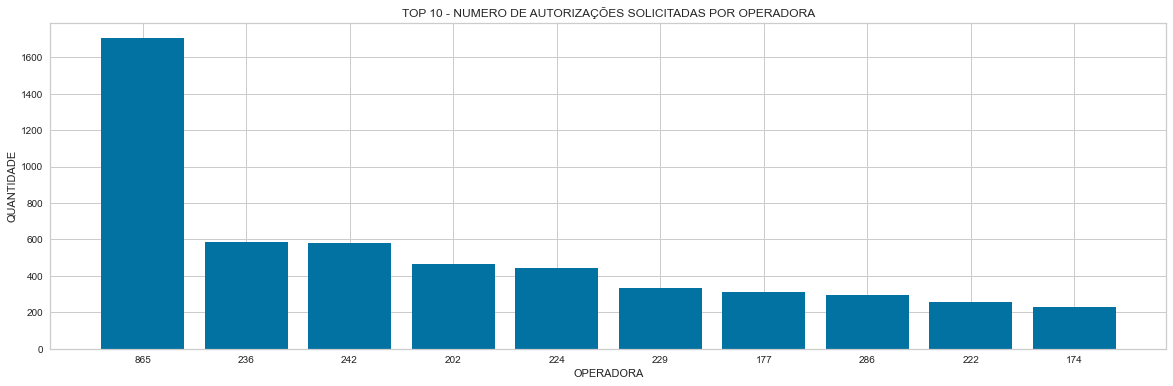

In [389]:
df = df_autorizacao['cd_requisitante'].astype(str)

plt.rcParams['figure.figsize'] = [20, 6]

x = df.value_counts().head(10).index

y = df.value_counts().head(10).values

plt.bar(x,y)

plt.ylabel("QUANTIDADE")

plt.xlabel("OPERADORA")

plt.title("TOP 10 - NUMERO DE AUTORIZAÇÕES SOLICITADAS POR OPERADORA")

plt.show();

### Quais os 10 planos que mais solicitaram autorização?

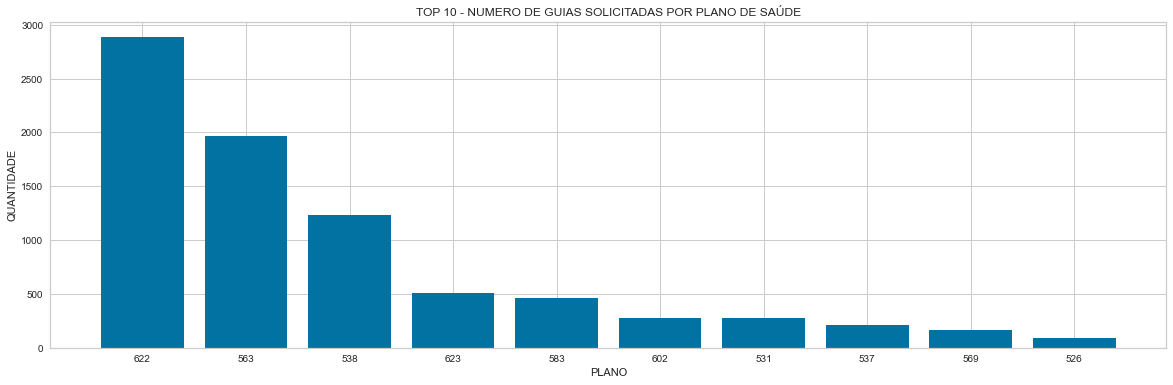

In [390]:
df = df_autorizacao['plano_beneficiario'].astype(str)

plt.rcParams['figure.figsize'] = [20, 6]

x = df.value_counts().head(10).index

y = df.value_counts().head(10).values

plt.bar(x,y)

plt.ylabel("QUANTIDADE")

plt.xlabel("PLANO")

plt.title("TOP 10 - NUMERO DE GUIAS SOLICITADAS POR PLANO DE SAÚDE")

plt.show();

### Quais foram os 10 serviços mais requisitados nas autorizações?

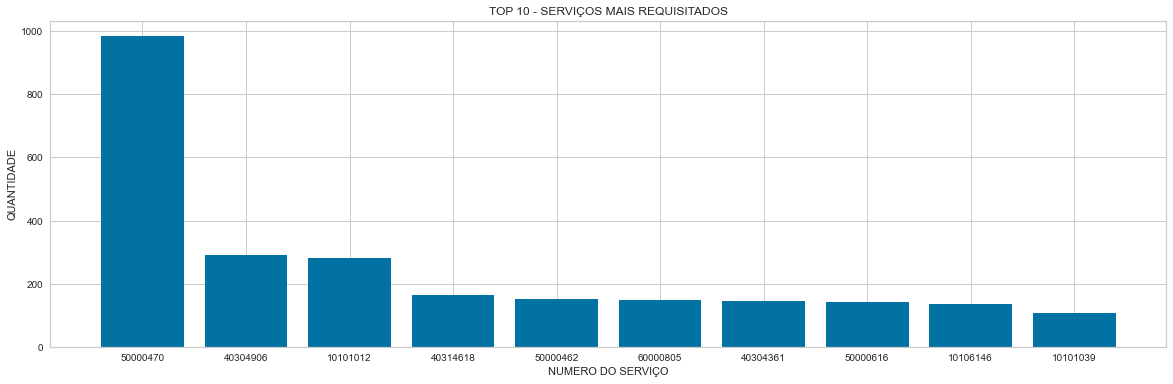

In [391]:
df = df_autorizacao['cd_servico'].astype(str)

plt.rcParams['figure.figsize'] = [20, 6]

x = df.value_counts().head(10).index

y = df.value_counts().head(10).values

plt.bar(x,y)

plt.ylabel("QUANTIDADE")

plt.xlabel("NUMERO DO SERVIÇO")

plt.title("TOP 10 - SERVIÇOS MAIS REQUISITADOS")

plt.show();

### Quantidade de autorizações por tipo de atendimento

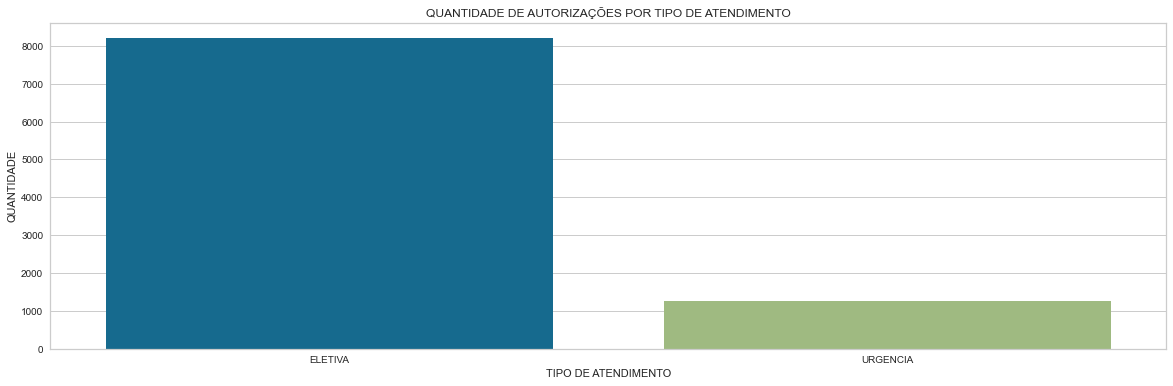

In [392]:
sns.countplot(x = df_autorizacao['tipo_atendimento'])

plt.ylabel("QUANTIDADE")

plt.xlabel("TIPO DE ATENDIMENTO")

plt.title("QUANTIDADE DE AUTORIZAÇÕES POR TIPO DE ATENDIMENTO")

plt.show();

### Quantidade de autorizações por situação


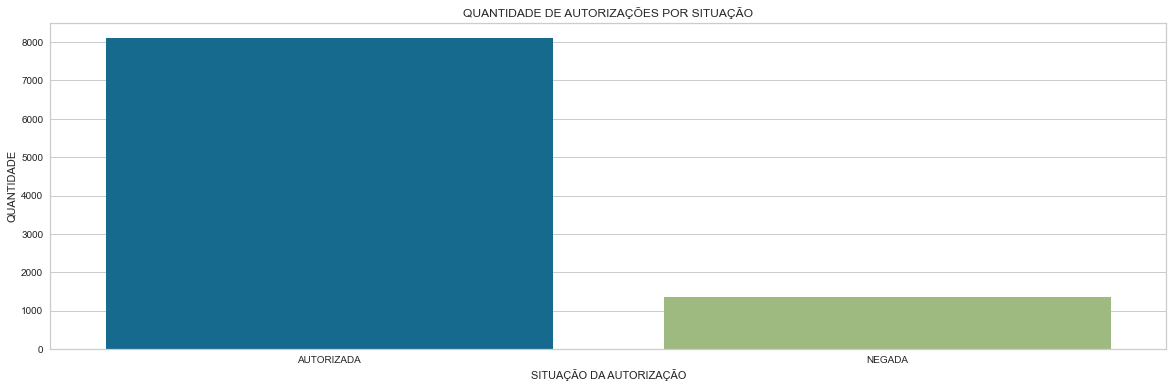

In [393]:
sns.countplot(x = df_autorizacao['situacao'])

plt.ylabel("QUANTIDADE")

plt.xlabel("SITUAÇÃO DA AUTORIZAÇÃO")

plt.title("QUANTIDADE DE AUTORIZAÇÕES POR SITUAÇÃO")

plt.show();

### Matriz de correlação dos atributos

In [394]:
#verificando a correlação dos atributos
corr = df_autorizacao.corr(method='pearson')
corr.style.background_gradient().set_precision(4).set_properties(**{'font-size': '10pt'})

,cd_servico,cd_guia,cd_executante,cd_requisitante,esp_executante,esp_requisitante,plano_beneficiario,cd_operadora
cd_servico,1.0000,0.0653,-0.0312,-0.0314,0.0167,0.0167,0.0108,-0.0314
cd_guia,0.0653,1.0000,-0.1010,-0.1011,0.1545,0.1545,-0.0030,-0.1011
cd_executante,-0.0312,-0.1010,1.0000,0.9974,-0.0187,-0.0187,0.1662,0.9974
cd_requisitante,-0.0314,-0.1011,0.9974,1.0000,-0.0187,-0.0187,0.1644,1.0000
esp_executante,0.0167,0.1545,-0.0187,-0.0187,1.0000,1.0000,-0.0522,-0.0187
esp_requisitante,0.0167,0.1545,-0.0187,-0.0187,1.0000,1.0000,-0.0522,-0.0187
plano_beneficiario,0.0108,-0.0030,0.1662,0.1644,-0.0522,-0.0522,1.0000,0.1644
cd_operadora,-0.0314,-0.1011,0.9974,1.0000,-0.0187,-0.0187,0.1644,1.0000


# Tratamento do dataframe para treinamento de modelos

### Reordenando as colunas

In [395]:
#reordenando as colunas
df_autorizacao = df_autorizacao[['cd_guia','cd_servico','tipo','origem','origem_beneficiario','cd_executante','cd_requisitante','esp_executante','esp_requisitante','plano_beneficiario','tipo_atendimento','tipo_consulta','cd_operadora','municipio','estado','pais','situacao']]
df_autorizacao.head()

,cd_guia,cd_servico,tipo,origem,origem_beneficiario,cd_executante,cd_requisitante,esp_executante,esp_requisitante,plano_beneficiario,tipo_atendimento,tipo_consulta,cd_operadora,municipio,estado,pais,situacao
0,5672237,1244,TRANSITO INTERNACAO,TRANSACAO,LOCAL,178,178,278,278,563,ELETIVA,NAO CONSULTA,178,NOVA OLINDA DO NORTE,AMAZONAS,BRASIL,AUTORIZADA
2,5332998,2500,TRANSITO INTERNACAO,TRANSACAO,LOCAL,202,202,278,278,538,URGENCIA,NAO CONSULTA,202,FERREIRA GOMES,AMAPA,BRASIL,AUTORIZADA
3,5332998,9350,TRANSITO INTERNACAO,TRANSACAO,LOCAL,202,202,278,278,538,URGENCIA,NAO CONSULTA,202,FERREIRA GOMES,AMAPA,BRASIL,AUTORIZADA
7,5404770,22403,TRANSITO INTERNACAO,TRANSACAO,LOCAL,282,282,278,278,583,URGENCIA,NAO CONSULTA,282,CAIRU,BAHIA,BRASIL,AUTORIZADA
8,5654489,24554,TRANSITO SERVICO,TRANSACAO,LOCAL,236,236,278,278,537,ELETIVA,NAO CONSULTA,236,APORA,BAHIA,BRASIL,AUTORIZADA


### Transformando a atributo situacao em codificação numerica

In [396]:
df_autorizacao['situacao'] = df_autorizacao['situacao'].map({'AUTORIZADA':1, 'NEGADA':0})

### Dividindo entre previsores e classe

In [397]:
#armazenando na variavel X_autorizacao os atributos previsores e convertendo os valores para o formado array do numpy
X_autorizacao = df_autorizacao.iloc[:, 0:16].values

In [398]:
#exibindo o conteudo da variavel X_autorizacao
X_autorizacao

array([[5672237, 1244, 'TRANSITO INTERNACAO', ...,
        'NOVA OLINDA DO NORTE', 'AMAZONAS', 'BRASIL'],
       [5332998, 2500, 'TRANSITO INTERNACAO', ..., 'FERREIRA GOMES',
        'AMAPA', 'BRASIL'],
       [5332998, 9350, 'TRANSITO INTERNACAO', ..., 'FERREIRA GOMES',
        'AMAPA', 'BRASIL'],
       ...,
       [5750255, 99999943, 'TRANSITO INTERNACAO', ..., 'IPIAU', 'BAHIA',
        'BRASIL'],
       [5790953, 99999943, 'TRANSITO INTERNACAO', ..., 'IPIAU', 'BAHIA',
        'BRASIL'],
       [77419622, 99999943, 'SERVIÇO', ..., 'CRUZEIRO DO SUL', 'ACRE',
        'BRASIL']], dtype=object)

In [399]:
#adicionando a variavel y_autorizacao o atributo situacao
y_autorizacao = df_autorizacao.iloc[:, 16].values

In [400]:
#exibindo o conteudo da variavel y_autorizacao
y_autorizacao

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

## Tratamento dos dados categoricos

### Metodo Label Enconder

In [401]:
label_encoder_tipo = LabelEncoder()
label_encoder_origem = LabelEncoder()
label_encoder_origem_beneficiario = LabelEncoder()
label_encoder_tipo_atendimento = LabelEncoder()
label_encoder_tipo_consulta = LabelEncoder()
label_encoder_municipio = LabelEncoder()
label_encoder_estado = LabelEncoder()
label_encoder_pais = LabelEncoder()

In [402]:
X_autorizacao[:,2] = label_encoder_tipo.fit_transform(X_autorizacao[:,2])
X_autorizacao[:,3] = label_encoder_origem.fit_transform(X_autorizacao[:,3])
X_autorizacao[:,4] = label_encoder_origem_beneficiario.fit_transform(X_autorizacao[:,4])
X_autorizacao[:,10] = label_encoder_tipo_atendimento.fit_transform(X_autorizacao[:,10])
X_autorizacao[:,11] = label_encoder_tipo_consulta.fit_transform(X_autorizacao[:,11])
X_autorizacao[:,13] = label_encoder_municipio.fit_transform(X_autorizacao[:,13])
X_autorizacao[:,14] = label_encoder_estado.fit_transform(X_autorizacao[:,14])
X_autorizacao[:,15] = label_encoder_pais.fit_transform(X_autorizacao[:,15])


In [403]:
X_autorizacao

array([[5672237, 1244, 4, ..., 115, 3, 0],
       [5332998, 2500, 4, ..., 84, 2, 0],
       [5332998, 9350, 4, ..., 84, 2, 0],
       ...,
       [5750255, 99999943, 4, ..., 93, 4, 0],
       [5790953, 99999943, 4, ..., 93, 4, 0],
       [77419622, 99999943, 2, ..., 75, 0, 0]], dtype=object)

## Dividindo os dados em treino e teste

In [404]:
nb_X_treino, nb_X_teste, nb_y_treino,nb_y_teste = train_test_split(X_autorizacao, y_autorizacao, test_size = 0.25, random_state=0)

# Treinando modelos

## Naive Bayes

In [405]:
naive_autorizacao = GaussianNB()
naive_autorizacao.fit(nb_X_treino,nb_y_treino)

GaussianNB()

In [406]:
nb_naive_prev = naive_autorizacao.predict(nb_X_teste)

In [407]:
nb_naive_prev

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [408]:
nb_y_teste

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [409]:
accuracy_score(nb_y_teste,nb_naive_prev)

0.8427726120033813

In [410]:
print(classification_report(nb_y_teste,nb_naive_prev, target_names=['NEGADA','AUTORIZADA']))

              precision    recall  f1-score   support

      NEGADA       0.30      0.02      0.04       363
  AUTORIZADA       0.85      0.99      0.91      2003

    accuracy                           0.84      2366
   macro avg       0.58      0.51      0.48      2366
weighted avg       0.76      0.84      0.78      2366



0.8427726120033813

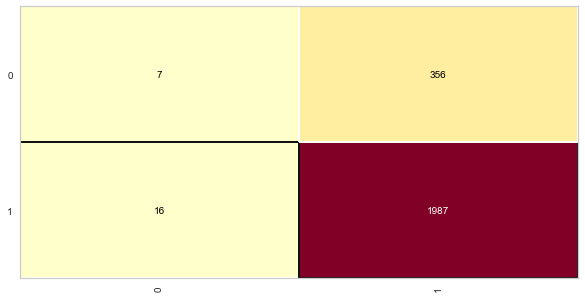

In [411]:
plt.rcParams['figure.figsize'] = [10, 5]
cm = ConfusionMatrix(naive_autorizacao)
cm.fit(nb_X_treino,nb_y_treino)
cm.score(nb_X_teste,nb_y_teste)

## Decision Tree

In [412]:
arvore_autorizacao = DecisionTreeClassifier(random_state=0)

In [413]:
arvore_autorizacao.fit(nb_X_treino,nb_y_treino)

DecisionTreeClassifier(random_state=0)

In [414]:
nb_arvore_prev = arvore_autorizacao.predict(nb_X_teste)

In [415]:
nb_arvore_prev

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [416]:
nb_y_teste

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [417]:
accuracy_score(nb_y_teste,nb_arvore_prev)

0.8829247675401521

In [418]:
print('\n',classification_report(nb_y_teste,nb_arvore_prev, target_names=['NEGADA','AUTORIZADA']))


               precision    recall  f1-score   support

      NEGADA       0.62      0.60      0.61       363
  AUTORIZADA       0.93      0.93      0.93      2003

    accuracy                           0.88      2366
   macro avg       0.78      0.77      0.77      2366
weighted avg       0.88      0.88      0.88      2366



0.8829247675401521

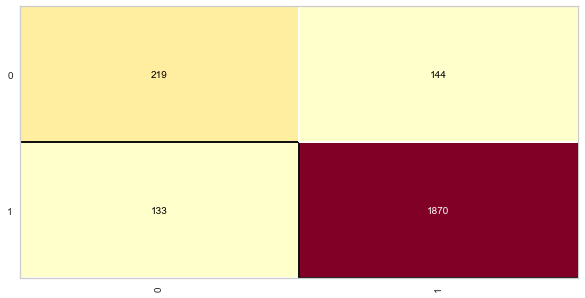

In [419]:
plt.rcParams['figure.figsize'] = [10, 5]
cm = ConfusionMatrix(arvore_autorizacao)
cm.fit(nb_X_treino,nb_y_treino)
cm.score(nb_X_teste,nb_y_teste)

## Random Forest

In [420]:
random_forest_autorizacao = RandomForestClassifier(random_state=0)

In [421]:
random_forest_autorizacao.fit(nb_X_treino,nb_y_treino)

RandomForestClassifier(random_state=0)

In [422]:
nb_random_forest_prev = random_forest_autorizacao.predict(nb_X_teste)

In [423]:
nb_random_forest_prev

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [424]:
nb_y_teste

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [425]:
accuracy_score(nb_y_teste,nb_random_forest_prev)

0.908284023668639

In [426]:
print('\n',classification_report(nb_y_teste,nb_random_forest_prev, target_names=['NEGADA','AUTORIZADA']))


               precision    recall  f1-score   support

      NEGADA       0.78      0.56      0.65       363
  AUTORIZADA       0.92      0.97      0.95      2003

    accuracy                           0.91      2366
   macro avg       0.85      0.77      0.80      2366
weighted avg       0.90      0.91      0.90      2366



0.908284023668639

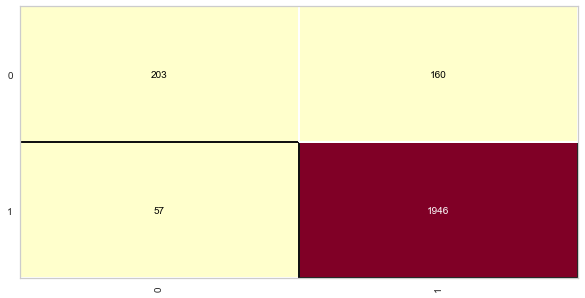

In [427]:
plt.rcParams['figure.figsize'] = [10, 5]
cm = ConfusionMatrix(random_forest_autorizacao)
cm.fit(nb_X_treino,nb_y_treino)
cm.score(nb_X_teste,nb_y_teste)

## Balanceamento da classe

Conforme podemos ver o numero da classe AUTORIZADA é muito superior a classe NEGADA. Dessa forma temos que tentar balancear essas classes para que o nosso modelo não seja enviesado. 

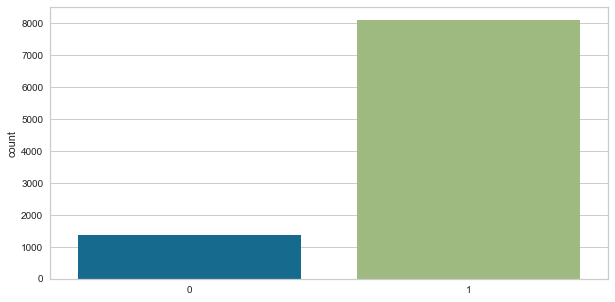

In [428]:
#plotando as classes antes do balanceamento
sns.countplot(x = y_autorizacao);

### SMOTE (Synthetic Minority Over-sampling Technique)
Gera dados sintéticos da classe minoritária.

In [429]:
smt = SMOTE()

In [430]:
#realizando o balanceamento
X_autorizacao, y_autorizacao = smt.fit_resample(X_autorizacao, y_autorizacao)

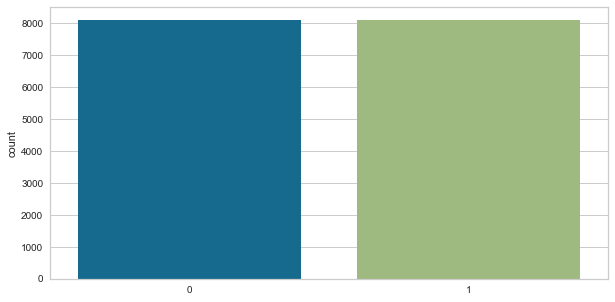

In [431]:
#plotando as classes apos o balanceamento
sns.countplot(x = y_autorizacao);

## Dividindo os dados em treino e teste

In [432]:
X_treino, X_teste, y_treino,y_teste = train_test_split(X_autorizacao, y_autorizacao, test_size = 0.25, random_state=0)

# Treinando modelos após o balanceamento da classe

## Naive Bayes

In [433]:
naive_autorizacao = GaussianNB()

In [434]:
naive_autorizacao.fit(X_treino,y_treino)

GaussianNB()

In [435]:
naive_prev = naive_autorizacao.predict(X_teste)

In [436]:
naive_prev

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [437]:
y_teste

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [438]:
accuracy_score(y_teste,naive_prev)

0.5040730683781782

In [439]:
print('\n',classification_report(y_teste,naive_prev, target_names=['NEGADA','AUTORIZADA']))


               precision    recall  f1-score   support

      NEGADA       0.60      0.10      0.16      2073
  AUTORIZADA       0.50      0.93      0.65      1978

    accuracy                           0.50      4051
   macro avg       0.55      0.51      0.41      4051
weighted avg       0.55      0.50      0.40      4051



0.5040730683781782

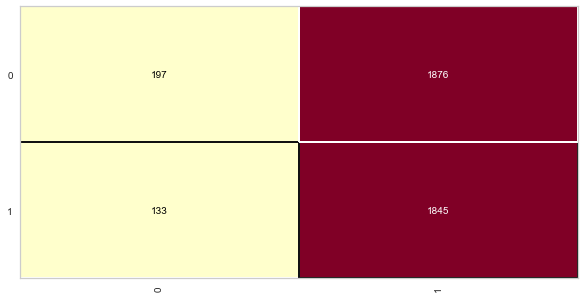

In [440]:
plt.rcParams['figure.figsize'] = [10, 5]
cm = ConfusionMatrix(naive_autorizacao)
cm.fit(X_treino,y_treino)
cm.score(X_teste,y_teste)

## Decision Tree

In [441]:
arvore_autorizacao = DecisionTreeClassifier(random_state=0)

In [442]:
arvore_autorizacao.fit(X_treino,y_treino)

DecisionTreeClassifier(random_state=0)

In [443]:
arvore_prev = arvore_autorizacao.predict(X_teste)

In [444]:
arvore_prev

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [445]:
y_teste

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [446]:
accuracy_score(y_teste,arvore_prev)

0.9229819797580844

In [447]:
print('\n',classification_report(y_teste,arvore_prev, target_names=['NEGADA','AUTORIZADA']))


               precision    recall  f1-score   support

      NEGADA       0.93      0.91      0.92      2073
  AUTORIZADA       0.91      0.93      0.92      1978

    accuracy                           0.92      4051
   macro avg       0.92      0.92      0.92      4051
weighted avg       0.92      0.92      0.92      4051



0.9229819797580844

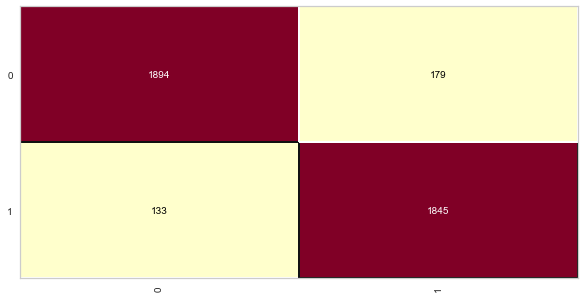

In [448]:
plt.rcParams['figure.figsize'] = [10, 5]
cm = ConfusionMatrix(arvore_autorizacao)
cm.fit(X_treino,y_treino)
cm.score(X_teste,y_teste)

## Random Forest

In [449]:
random_forest_autorizacao = RandomForestClassifier(random_state=0)

In [450]:
random_forest_autorizacao.fit(X_treino,y_treino)

RandomForestClassifier(random_state=0)

In [451]:
random_forest_prev = random_forest_autorizacao.predict(X_teste)

In [452]:
random_forest_prev

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [453]:
y_teste

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [454]:
accuracy_score(y_teste,random_forest_prev)

0.9563070846704518

In [455]:
print('\n',classification_report(y_teste,random_forest_prev, target_names=['NEGADA','AUTORIZADA']))


               precision    recall  f1-score   support

      NEGADA       0.97      0.94      0.96      2073
  AUTORIZADA       0.94      0.97      0.96      1978

    accuracy                           0.96      4051
   macro avg       0.96      0.96      0.96      4051
weighted avg       0.96      0.96      0.96      4051



0.9563070846704518

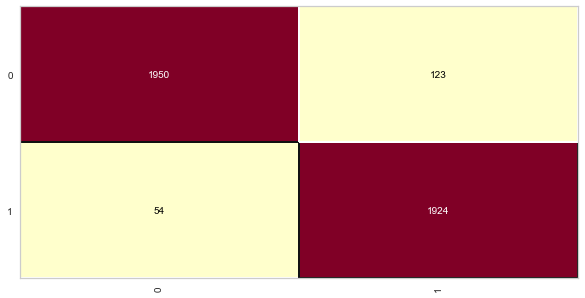

In [456]:
plt.rcParams['figure.figsize'] = [10, 5]
cm = ConfusionMatrix(random_forest_autorizacao)
cm.fit(X_treino,y_treino)
cm.score(X_teste,y_teste)

# Comparando os resultados dos modelos com classe balanceada e não balanceada

## Naive Bayes

In [457]:
print("##### Não Balanceado #####")
print(classification_report(nb_y_teste,nb_naive_prev, target_names=['NEGADA','AUTORIZADA']))
print("\n\n##### Balanceado #####")
print('\n',classification_report(y_teste,naive_prev, target_names=['NEGADA','AUTORIZADA']))

##### Não Balanceado #####
              precision    recall  f1-score   support

      NEGADA       0.30      0.02      0.04       363
  AUTORIZADA       0.85      0.99      0.91      2003

    accuracy                           0.84      2366
   macro avg       0.58      0.51      0.48      2366
weighted avg       0.76      0.84      0.78      2366



##### Balanceado #####

               precision    recall  f1-score   support

      NEGADA       0.60      0.10      0.16      2073
  AUTORIZADA       0.50      0.93      0.65      1978

    accuracy                           0.50      4051
   macro avg       0.55      0.51      0.41      4051
weighted avg       0.55      0.50      0.40      4051



## Arvore de decisão

In [458]:
print("##### Não Balanceado #####")
print(classification_report(nb_y_teste,nb_arvore_prev, target_names=['NEGADA','AUTORIZADA']))
print("\n\n##### Balanceado #####")
print('\n',classification_report(y_teste,arvore_prev, target_names=['NEGADA','AUTORIZADA']))

##### Não Balanceado #####
              precision    recall  f1-score   support

      NEGADA       0.62      0.60      0.61       363
  AUTORIZADA       0.93      0.93      0.93      2003

    accuracy                           0.88      2366
   macro avg       0.78      0.77      0.77      2366
weighted avg       0.88      0.88      0.88      2366



##### Balanceado #####

               precision    recall  f1-score   support

      NEGADA       0.93      0.91      0.92      2073
  AUTORIZADA       0.91      0.93      0.92      1978

    accuracy                           0.92      4051
   macro avg       0.92      0.92      0.92      4051
weighted avg       0.92      0.92      0.92      4051



## Random Forest

In [459]:
print("##### Não Balanceado #####")
print(classification_report(nb_y_teste,nb_random_forest_prev, target_names=['NEGADA','AUTORIZADA']))
print("\n\n##### Balanceado #####")
print('\n',classification_report(y_teste,random_forest_prev, target_names=['NEGADA','AUTORIZADA']))

##### Não Balanceado #####
              precision    recall  f1-score   support

      NEGADA       0.78      0.56      0.65       363
  AUTORIZADA       0.92      0.97      0.95      2003

    accuracy                           0.91      2366
   macro avg       0.85      0.77      0.80      2366
weighted avg       0.90      0.91      0.90      2366



##### Balanceado #####

               precision    recall  f1-score   support

      NEGADA       0.97      0.94      0.96      2073
  AUTORIZADA       0.94      0.97      0.96      1978

    accuracy                           0.96      4051
   macro avg       0.96      0.96      0.96      4051
weighted avg       0.96      0.96      0.96      4051



## Comparando a acurácia

In [460]:
print("##### Não Balanceado #####")
print('Naive Bayes:',accuracy_score(nb_y_teste,nb_naive_prev))
print('Arvore de decisão:',accuracy_score(nb_y_teste,nb_arvore_prev))
print('Random forest:',accuracy_score(nb_y_teste,nb_random_forest_prev))

print("\n##### Balanceado #####")
print('Naive Bayes:',accuracy_score(y_teste,naive_prev))
print('Arvore de decisão:',accuracy_score(y_teste,arvore_prev))
print('Random forest:',accuracy_score(y_teste,random_forest_prev))

##### Não Balanceado #####
Naive Bayes: 0.8427726120033813
Arvore de decisão: 0.8829247675401521
Random forest: 0.908284023668639

##### Balanceado #####
Naive Bayes: 0.5040730683781782
Arvore de decisão: 0.9229819797580844
Random forest: 0.9563070846704518
